<a href="https://colab.research.google.com/github/kellykryoung/AI_Study/blob/main/textmining/01_02_Project_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 2023. May
# Instructor: Soyeon, Lee
# Project : Do yourself!

## Insurance Prediction
* to predict how much an indiviual will pay for insurance using medical insurance data

The description of the columns that make up the data is as follows:

- Age: 피보험자의 나이
- Sex: 피보험자의 성별
- BMI: 피보험자의 체질량 지수 -  $weight(kg) / height(m)^2$
- Children: 피보험자의 자녀의 수
- Smoker: 흡연 여부 (yes / no)
- Region: 피보험자가 거주하는 지역 (Southeast / Southwest / Northeast / Northwest)
- Charges: 보험료

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings


## _01. Data Sets

In [2]:
# Data Source!!!!
# gdown => download from a google drive
# --id : 이 부분은 다운로드하려는 파일의 고유 ID. 구글 드라이브에서 파일을 선택하고 "링크를 공유"하면 파일의 URL에서 이 ID를 찾을 수 있음

!gdown --id 1cdFYc-VI-1nDuSecY-H1eSC1W0OR-CR_

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cdFYc-VI-1nDuSecY-H1eSC1W0OR-CR_
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 79.2MB/s]


In [4]:
import pandas as pd

df = pd.read_csv('insurance.csv')
df.insert(0,'ID', range(1, len(df) + 1))

## _02. Data EDA

In [5]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [102]:
x_data = df.iloc[:, 1:-1]
x_data

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [6]:
# 타깃 데이터 확인
y_data = df[['charges']]
y_data

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [7]:
y_data.value_counts

<bound method DataFrame.value_counts of           charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]>

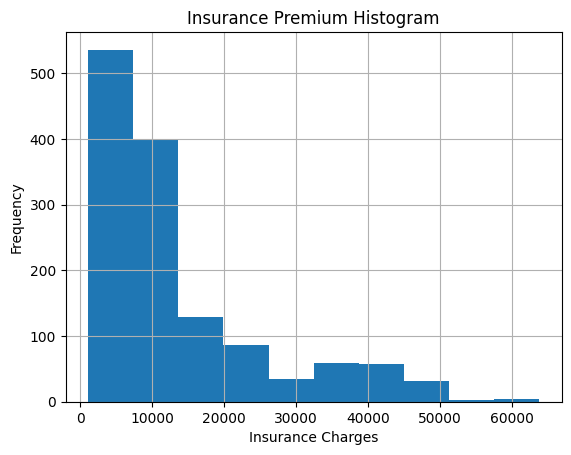

In [8]:
# target data distribution

# dataframe.hist()
y_data.hist()

plt.title('Insurance Premium Histogram')
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')

# show the histogram
plt.show()

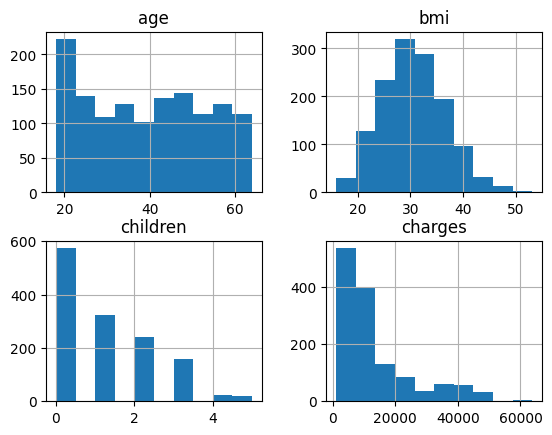

In [9]:
# Check Data Distribution : nemerical_data
df.iloc[:, 1:].hist()
plt.show()

In [11]:
# Check Data Distribution :categorical_data categorical_data _ df[''].value_counts()

sex_counts = df['sex'].value_counts()
smoker_counts = df['smoker'].value_counts()
region_counts = df['region'].value_counts()

print('=== sex ===')
print(sex_counts)
print('\n=== smoker ===')
print(smoker_counts)
print('\n=== region ===')
print(region_counts)

=== sex ===
male      676
female    662
Name: sex, dtype: int64

=== smoker ===
no     1064
yes     274
Name: smoker, dtype: int64

=== region ===
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


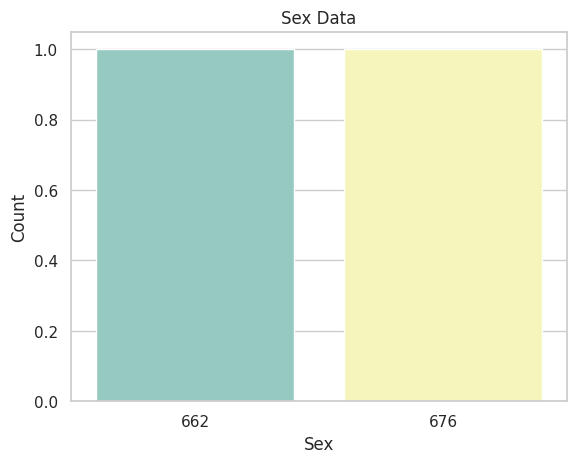

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical Data (카테고리 열)
sex_ctg = ['male', 'female']
smoker_ctg =['no','yes']
region_ctg=['southeast','southwest','northwest','northeast']


# count plot
sns.set(style="whitegrid")
ax = sns.countplot(x=sex_counts, palette="Set3")  # x에는 카테고리형 데이터.

# title and axis
plt.title('Sex Data')
plt.xlabel('Sex')
plt.ylabel('Count')

# show
plt.show()

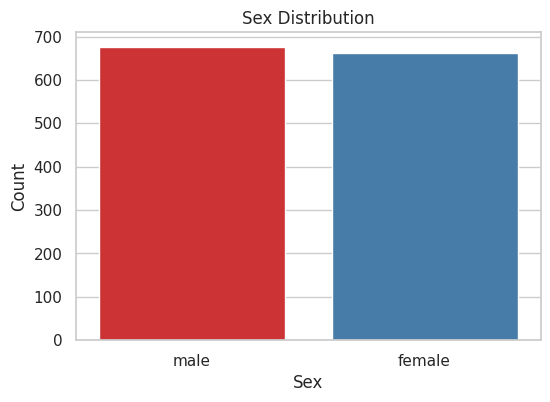

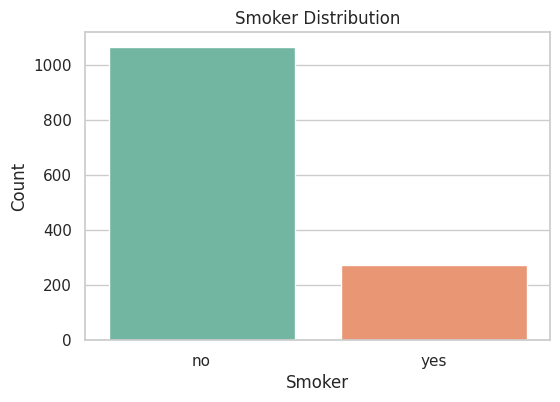

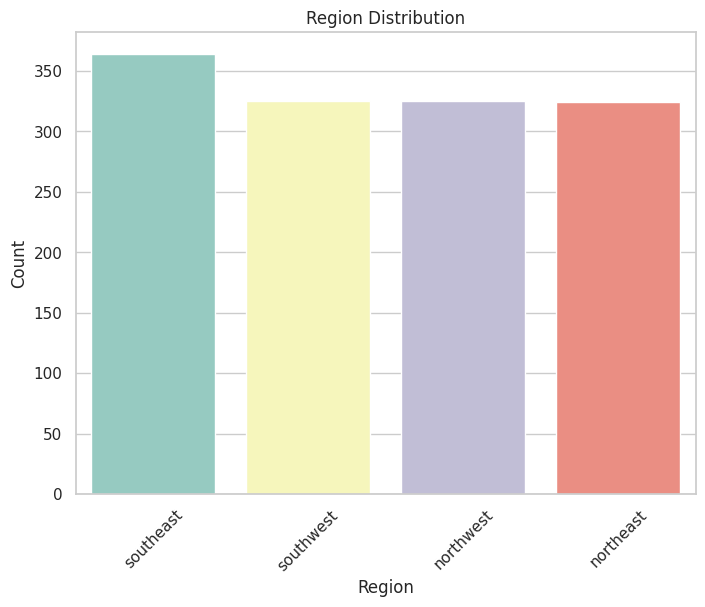

In [13]:
data = {'sex': df['sex'],
        'smoker': df['smoker'],
        'region': df['region']}

# DataFrame 생성
ctg_data_df = pd.DataFrame(data)

# Sex 카테고리 분포 시각화
plt.figure(figsize=(6, 4))
#sns.set(style="whitegrid")
sex_counts = df['sex'].value_counts()
ax = sns.countplot(x='sex', data=ctg_data_df, palette="Set1", order=sex_counts.index)
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
plt.title('Sex Distribution')
plt.show()

# Smoker 카테고리 분포 시각화
plt.figure(figsize=(6, 4))
#sns.set(style="whitegrid")
smoker_counts = df['smoker'].value_counts()
ax = sns.countplot(x='smoker', data=ctg_data_df, palette="Set2", order=smoker_counts.index)
ax.set_xlabel('Smoker')
ax.set_ylabel('Count')
plt.title('Smoker Distribution')
plt.show()

# Region 카테고리 분포 시각화
plt.figure(figsize=(8, 6))
#sns.set(style="whitegrid")
region_counts = df['region'].value_counts()
ax = sns.countplot(x='region', data=ctg_data_df, palette="Set3", order=region_counts.index)
ax.set_xlabel('Region')
ax.set_ylabel('Count')
plt.title('Region Distribution')
plt.xticks(rotation=45)  # x 축 레이블 회전
plt.show()

In [14]:
ctg_data_df

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


## _03.Data Preprocessing


In [15]:
# missing data (결측치)
df.isnull().sum()

ID          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
processed_df =df.copy()

In [17]:
processed_df

,ID,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


In [21]:
# scaled _ numerical_data(수치형 데이터)
from sklearn.preprocessing import StandardScaler

STD_scaler = StandardScaler()

processed_df['scaled_bmi'] = STD_scaler.fit_transform(processed_df[['bmi']])
processed_df.drop(['bmi'], axis=1, inplace=True)
processed_df

,ID,age,sex,children,smoker,region,charges,scaled_bmi
0,1,19,female,0,yes,southwest,16884.92400,-0.453320
1,2,18,male,1,no,southeast,1725.55230,0.509621
2,3,28,male,3,no,southeast,4449.46200,0.383307
3,4,33,male,0,no,northwest,21984.47061,-1.305531
4,5,32,male,0,no,northwest,3866.85520,-0.292556
...,...,...,...,...,...,...,...,...
1333,1334,50,male,3,no,northwest,10600.54830,0.050297
1334,1335,18,female,0,no,northeast,2205.98080,0.206139
1335,1336,18,female,0,no,southeast,1629.83350,1.014878
1336,1337,21,female,0,no,southwest,2007.94500,-0.797813


In [22]:
# categorical data(카테고리형 데이터)
from sklearn.preprocessing import LabelEncoder

LB_encoder = LabelEncoder()

In [25]:
# label encoded_ categorical data(카테고리형 데이터)
processed_df['sex'] = LB_encoder.fit_transform(processed_df['sex'])
processed_df['smoker'] = LB_encoder.fit_transform(processed_df['smoker'])
processed_df['region'] = LB_encoder.fit_transform(processed_df['region'])

processed_df


,ID,age,sex,children,smoker,region,charges,scaled_bmi
0,1,19,0,0,1,3,16884.92400,-0.453320
1,2,18,1,1,0,2,1725.55230,0.509621
2,3,28,1,3,0,2,4449.46200,0.383307
3,4,33,1,0,0,1,21984.47061,-1.305531
4,5,32,1,0,0,1,3866.85520,-0.292556
...,...,...,...,...,...,...,...,...
1333,1334,50,1,3,0,1,10600.54830,0.050297
1334,1335,18,0,0,0,0,2205.98080,0.206139
1335,1336,18,0,0,0,2,1629.83350,1.014878
1336,1337,21,0,0,0,3,2007.94500,-0.797813


In [27]:
# DataFrame의 열 이름 추출
column_names = processed_df.columns.tolist()
column_names

['ID', 'age', 'sex', 'children', 'smoker', 'region', 'charges', 'scaled_bmi']

In [30]:
# 열이름 순서를 정하고 싶을 때, df[['열이름']]
processed_df = processed_df[['ID', 'age', 'sex', 'scaled_bmi', 'children', 'smoker', 'region', 'charges']]
processed_df

,ID,age,sex,scaled_bmi,children,smoker,region,charges
0,1,19,0,-0.453320,0,1,3,16884.92400
1,2,18,1,0.509621,1,0,2,1725.55230
2,3,28,1,0.383307,3,0,2,4449.46200
3,4,33,1,-1.305531,0,0,1,21984.47061
4,5,32,1,-0.292556,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,1,0.050297,3,0,1,10600.54830
1334,1335,18,0,0.206139,0,0,0,2205.98080
1335,1336,18,0,1.014878,0,0,2,1629.83350
1336,1337,21,0,-0.797813,0,0,3,2007.94500


In [47]:
# 그 외 필요한 전처리
X_data = processed_df.iloc[:, 1:-1]
y_data = processed_df.iloc[:, -1]

In [49]:
X_data.shape, y_data.shape

((1338, 6), (1338,))

In [44]:
# import numpy as np
# X_data = np.array(X_data)
# X_data = X_data.reshape(1338,6,1)
# X_data.shape

(1338, 6, 1)

## _04. Modeling

### _04_01. LinearRegression

In [50]:
# Train-Validation Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)

In [107]:
# LinearRegression
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_data, y_data)


LinearRegression()

In [114]:
# 예측
y_pred_LR= LR_model.predict(X_train)
y_test_pred_LR = LR_model.predict(X_test)

# 모델 성능 확인
r2_train_score_LR = LR_model.score(X_train, y_train)
r2_test_score_LR = LR_model.score(X_test, y_test)
print(r2_train_score_LR, r2_test_score_LR)

0.7644315418437118 0.7144254642205324


In [115]:
y_train.shape, y_pred_LR.shape

((1003,), (1003,))

### _04_02. Ridge

alpha: 0.0001
R2 train: 0.7646306525065235
R2 test: 0.713199740266993


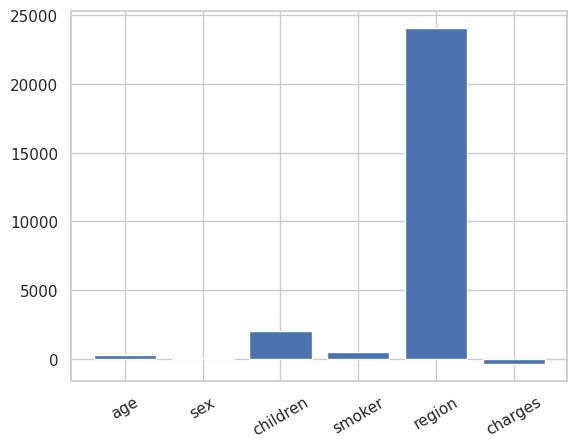

alpha: 0.1
R2 train: 0.7646303963913006
R2 test: 0.7132267616432086


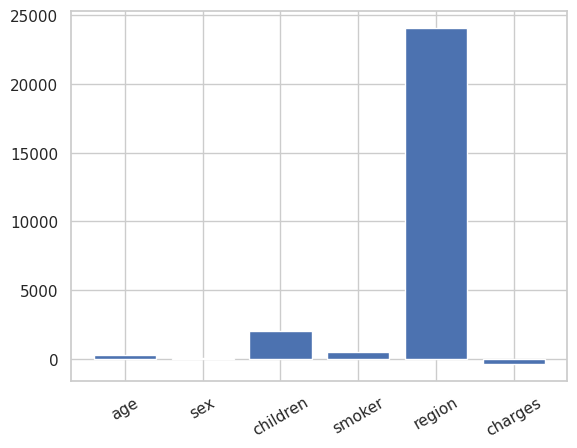

alpha: 1
R2 train: 0.7646053309043777
R2 test: 0.7134465956323683


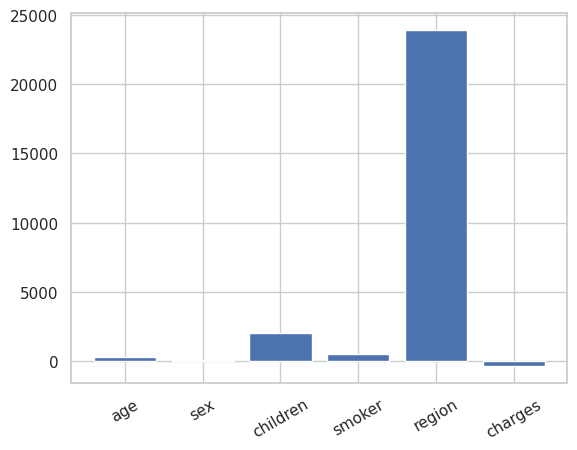

alpha: 10
R2 train: 0.762363104250223
R2 test: 0.7135732336584899


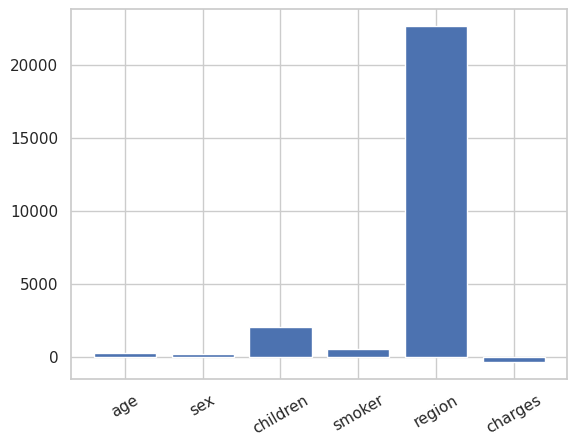

alpha: 100
R2 train: 0.6683659143168685
R2 test: 0.6375214954935606


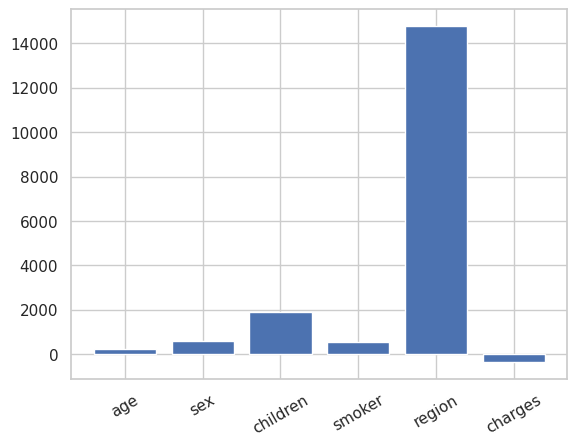

alpha: 10000
R2 train: 0.1010342661860868
R2 test: 0.14760501334197662


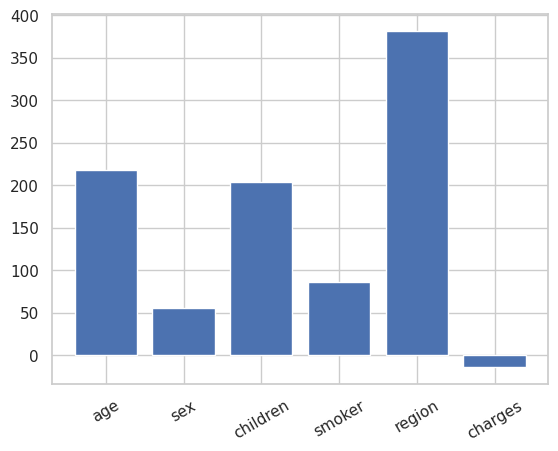

In [56]:
from sklearn.metrics import r2_score

alpha_list = [0.0001, 0.1, 1, 10, 100, 10000]
for i in alpha_list:

    # 1. Model instance
    RG_model = Ridge(alpha=i)

    # 2. Model Training
    RG_model.fit(X_train, y_train) # housing data

    # 3. Model Score
    r2_train_RG = RG_model.score(X_train, y_train)
    r2_test_RG = RG_model.score(X_test, y_test)

    print('alpha:', i)
    print('R2 train:', r2_train_RG)
    print('R2 test:', r2_test_RG)


    # visulize the coeficient
    plt.bar(column_names[1:-1], RG_model.coef_ ) #x, y
    plt.xticks(rotation=30)
    plt.show()

In [91]:
RG_best_model= Lasso(alpha= 0.0001)
RG_best_model.fit(X_train, y_train)
y_pred_RG = RG_best_model.predict(X_train)
y_pred_test_RG = RG_best_model.predict(X_test)

In [93]:
print('Ridge model을 통한 예측되는 보험료:', y_pred_test_RG)

Ridge model을 통한 예측되는 보험료: [ 6463.14945381  5749.29327099  -145.21661991  3727.33554633
 31465.12537243  9988.99915991 15409.46335702 10042.37352542
 34198.52338091 33187.03925067  9970.93918296 11329.51977465
 18548.02550193 11134.61026998  5399.88911535  5528.51986395
 13182.50723565 39816.13748958 18806.83402886  3844.30731069
   583.52583185 38535.6233416  12401.76356051  5717.25696184
   575.76324687  5774.07208772  3246.67089529  5975.92335802
  5693.23854692  3234.58537638 13428.18942413  2185.17986934
  2064.42305755 -1594.05543337 11833.18029074  9123.9055534
  9432.06864972  9683.1806899  10165.80560105  5311.04487266
  6898.80225346 16125.71795592  9551.4479908  13446.41896215
 35253.53248768 12561.50102953  8655.52514641   -57.53826001
  8231.86805155 10454.65449664 11288.50708944 14162.76273004
 11872.55747191  2569.14704102 10026.40635574  3111.74973969
  6973.12632374  1815.41453817  2726.27961112 11246.72889939
 11851.33259406  3865.20155101   956.78396701 11641.20918832

### _04_03. Lasso

alpha: 0.0001
R2_train : 0.7646306525067792
R2_test : 0.713199715551809


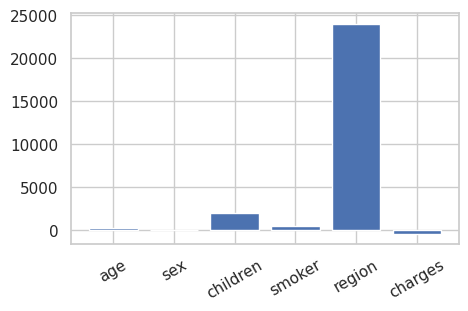

alpha: 0.1
R2_train : 0.7646306516733332
R2_test : 0.7132023110699193


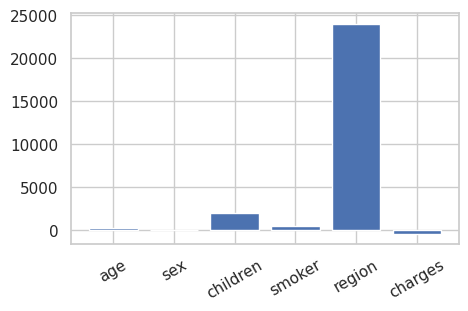

alpha: 1
R2_train : 0.7646305691723729
R2_test : 0.7132256288373535


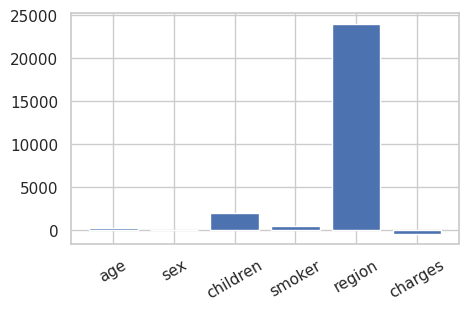

alpha: 10
R2_train : 0.764622318797024
R2_test : 0.7134526156661549


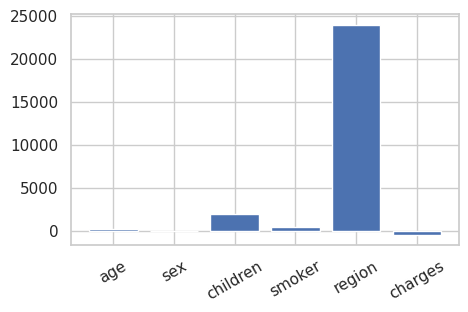

alpha: 100
R2_train : 0.7639907071946617
R2_test : 0.714558002099714


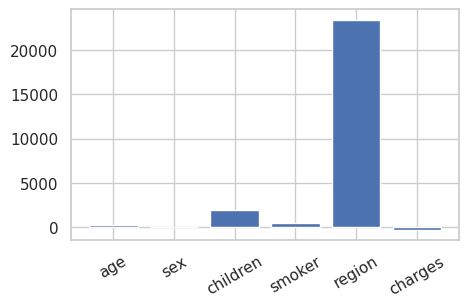

alpha: 10000
R2_train : 0.06933999540170088
R2_test : 0.11139090943331587


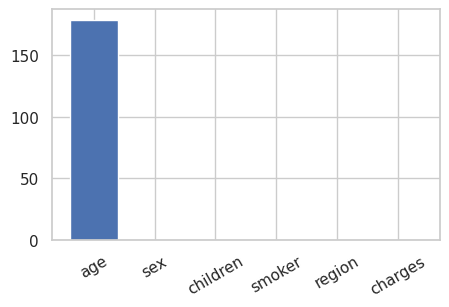

In [83]:
alpha_list = [0.0001, 0.1, 1, 10, 100, 10000]

for i in alpha_list:
    print('alpha:', i)

    # call the model
    LSS_model = Lasso(alpha=i)
    LSS_model.fit(X_train, y_train)
    # y_pred = LSS_model.predict(X_train)
    # y_test_pred = LSS_model.predict(X_test)

    # evalutate
    R2_train_LSS = LSS_model.score(X_train, y_train)
    R2_test_LSS = LSS_model.score(X_test, y_test)
    print("R2_train :" ,R2_train_LSS )
    print("R2_test :", R2_test_LSS)

    # Visualization
    plt.figure(figsize=(5,3))
    plt.bar(column_names[1:-1], LSS_model.coef_)
    plt.xticks(rotation=30)
    plt.show()

In [87]:
Lss_best_model= Lasso(alpha= 0.0001)
Lss_best_model.fit(X_train, y_train)
y_pred_LSS = Lss_best_model.predict(X_train)
y_pred_test_LSS = Lss_best_model.predict(X_test)

In [88]:
print('Lasso model을 통한 예측되는 보험료:', y_pred_test_LSS)

Lasso model을 통한 예측되는 보험료: [ 6463.14945381  5749.29327099  -145.21661991  3727.33554633
 31465.12537243  9988.99915991 15409.46335702 10042.37352542
 34198.52338091 33187.03925067  9970.93918296 11329.51977465
 18548.02550193 11134.61026998  5399.88911535  5528.51986395
 13182.50723565 39816.13748958 18806.83402886  3844.30731069
   583.52583185 38535.6233416  12401.76356051  5717.25696184
   575.76324687  5774.07208772  3246.67089529  5975.92335802
  5693.23854692  3234.58537638 13428.18942413  2185.17986934
  2064.42305755 -1594.05543337 11833.18029074  9123.9055534
  9432.06864972  9683.1806899  10165.80560105  5311.04487266
  6898.80225346 16125.71795592  9551.4479908  13446.41896215
 35253.53248768 12561.50102953  8655.52514641   -57.53826001
  8231.86805155 10454.65449664 11288.50708944 14162.76273004
 11872.55747191  2569.14704102 10026.40635574  3111.74973969
  6973.12632374  1815.41453817  2726.27961112 11246.72889939
 11851.33259406  3865.20155101   956.78396701 11641.20918832

### _04_04.ElasticNet

In [65]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

ELST_model = ElasticNet()

grid_params = {'alpha': [0.0001, 0.1, 1, 10, 100, 10000],
               'fit_intercept' : [True, False]}

Grid_ELST_model= GridSearchCV(ELST_model, param_grid = grid_params,
                              cv = 3, refit=True, scoring='r2')
# refit: True is the default value, If True, the best parameters are returned

In [66]:
Grid_ELST_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.1, 1, 10, 100, 10000],
                         'fit_intercept': [True, False]},
             scoring='r2')

In [67]:
Grid_df = pd.DataFrame(Grid_ELST_model.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]
Grid_df

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.0001, 'fit_intercept': True}",0.756884,1,0.742842,0.730761,0.797049
1,"{'alpha': 0.0001, 'fit_intercept': False}",0.755840,2,0.739479,0.730406,0.797633
2,"{'alpha': 0.1, 'fit_intercept': True}",0.719581,4,0.706935,0.710301,0.741508
3,"{'alpha': 0.1, 'fit_intercept': False}",0.719615,3,0.707394,0.710261,0.741191
4,"{'alpha': 1, 'fit_intercept': True}",0.380162,6,0.391942,0.380834,0.367709
5,"{'alpha': 1, 'fit_intercept': False}",0.380860,5,0.400859,0.377020,0.364702
6,"{'alpha': 10, 'fit_intercept': True}",0.121799,7,0.146286,0.119191,0.099922
7,"{'alpha': 10, 'fit_intercept': False}",0.113901,8,0.151118,0.106110,0.084475
8,"{'alpha': 100, 'fit_intercept': True}",0.072667,9,0.092632,0.071747,0.053621
9,"{'alpha': 100, 'fit_intercept': False}",0.063450,10,0.104452,0.057281,0.028618


In [69]:
ELST_best_model = ElasticNet(alpha=0.0001, l1_ratio=1.0)
ELST_best_model.fit(X_train, y_train)
ELST_best_model.coef_

array([  257.88711055,    88.72609048,  2020.75131817,   532.12126809,
       24051.07671801,  -384.06845715])

In [90]:
y_pred_ELST = ELST_best_model.predict(X_train)
print('ElasticNet model을 통해 예측되는 보험료:' , y_pred_ELST)

ElasticNet model을 통해 예측되는 보험료: [13275.95182461 26525.21866145 16147.76589237 ...  7328.11001798
  8183.8988522  12413.78346601]


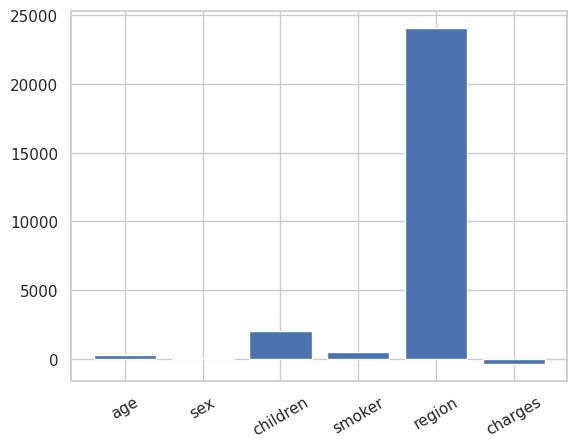

In [72]:
# visualization
y = Grid_df['mean_test_score']
plt.bar(column_names[1:-1], ELST_best_model.coef_)
plt.xticks(rotation=30)
plt.show()

## _05. Predict and Evaluate

In [116]:
# LinearRegession_r2 score
R2_train_LR = LR_model.score(X_train, y_train)
R2_test_LR = LR_model.score(X_test, y_test)

R2_train_LR, R2_test_LR

(0.7644315418437118, 0.7144254642205324)

In [117]:
# LinearRegession_mse (오차 제곱의 평균)
from sklearn.metrics import mean_squared_error
mse_LR = mean_squared_error(y_pred_LR, y_train, squared= False)
mse_LR

5781.325603035511

In [99]:
# Ridge_ r2 score
R2_train_RG = RG_best_model.score(X_train, y_train)
R2_test_RG = RG_best_model.score(X_test, y_test)

R2_train_RG, R2_test_RG

(0.7646306525067792, 0.713199715551809)

In [103]:
# Ridge_ mse (오차 제곱의 평균)
from sklearn.metrics import mean_squared_error
mse_RG = mean_squared_error(y_pred_RG, y_train, squared= False)
mse_RG

5778.88179767947

In [95]:
# Lasso_ r2 score
R2_train_Lasso = Lss_best_model.score(X_train, y_train)
R2_test_Lasso = Lss_best_model.score(X_test, y_test)

R2_train_Lasso, R2_test_Lasso

(0.7646306525067792, 0.713199715551809)

In [102]:
# Lasso_ mse (오차 제곱의 평균)
from sklearn.metrics import mean_squared_error
mse_Lasso = mean_squared_error(y_pred_LSS, y_train, squared= False)
mse_Lasso

5778.88179767947

In [75]:
# ElasticNet_r2 score
R2_train_ELST = ELST_best_model.score(X_train, y_train)
R2_test_ELST = ELST_best_model.score(X_test, y_test)

R2_train_ELST, R2_test_ELST

(0.7646306525067792, 0.713199715551809)

In [119]:
# ElasticNet_mse (오차 제곱의 평균)
from sklearn.metrics import mean_squared_error
mse_ELST = mean_squared_error(y_pred_ELST, y_train, squared= False)
mse_ELST

5778.88179767947